# Explore here

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
df.shape

(1338, 7)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [68]:
df.duplicated().sum()

np.int64(1)

In [69]:
#eliminar columnas
delete_colum = ['region']
df.drop(delete_colum, axis=1, inplace=True)

In [70]:
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [71]:
#analisis univariante, categorico
import matplotlib.pyplot as plt
import seaborn as sns 

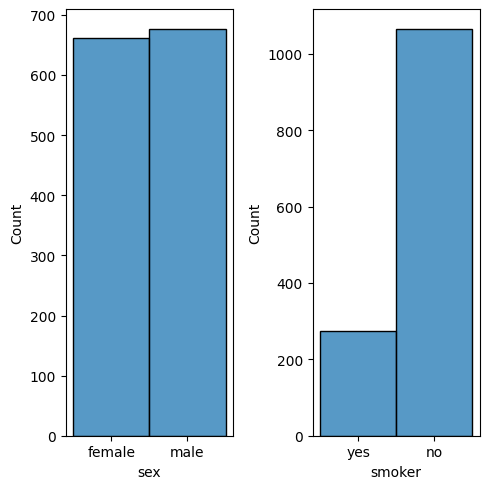

In [72]:
#crear gráficos
fig, axis = plt.subplots(1,2, figsize=(5,5))

sns.histplot(ax= axis[0], data= df,x= 'sex')
sns.histplot(ax= axis[1], data= df,x= 'smoker')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

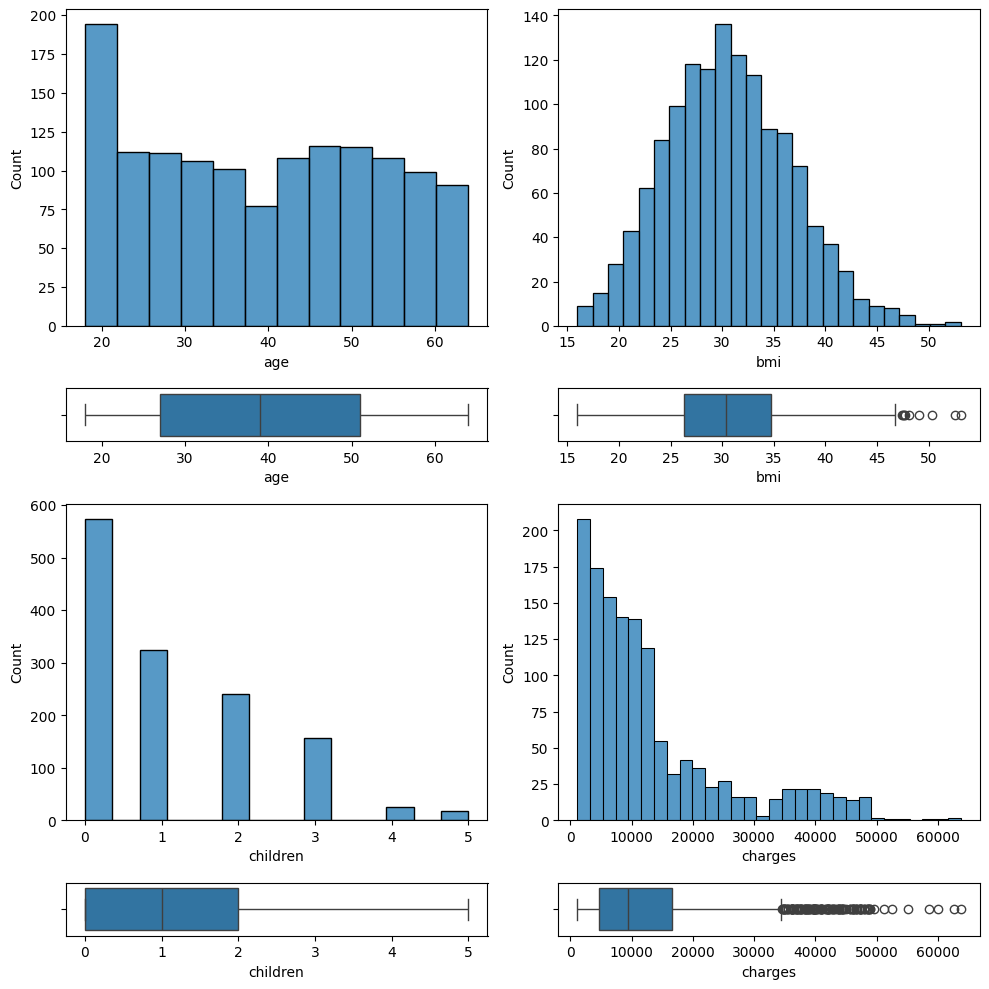

In [73]:
#analisis univariante, numerico 
fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={'height_ratios':[6,1,6,1]})

sns.histplot(ax=axis[0,0], data= df,x= 'age')
sns.boxplot(ax=axis[1,0], data=df, x='age')

sns.histplot(ax=axis[0,1], data= df,x= 'bmi')
sns.boxplot(ax=axis[1,1], data=df, x='bmi')

sns.histplot(ax=axis[2,0], data= df,x= 'children')
sns.boxplot(ax=axis[3,0], data=df, x='children')

sns.histplot(ax=axis[2,1], data= df,x= 'charges')
sns.boxplot(ax=axis[3,1], data=df, x='charges')



plt.tight_layout()
plt.show

In [74]:
#transformar variables categoricas en numericas
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]

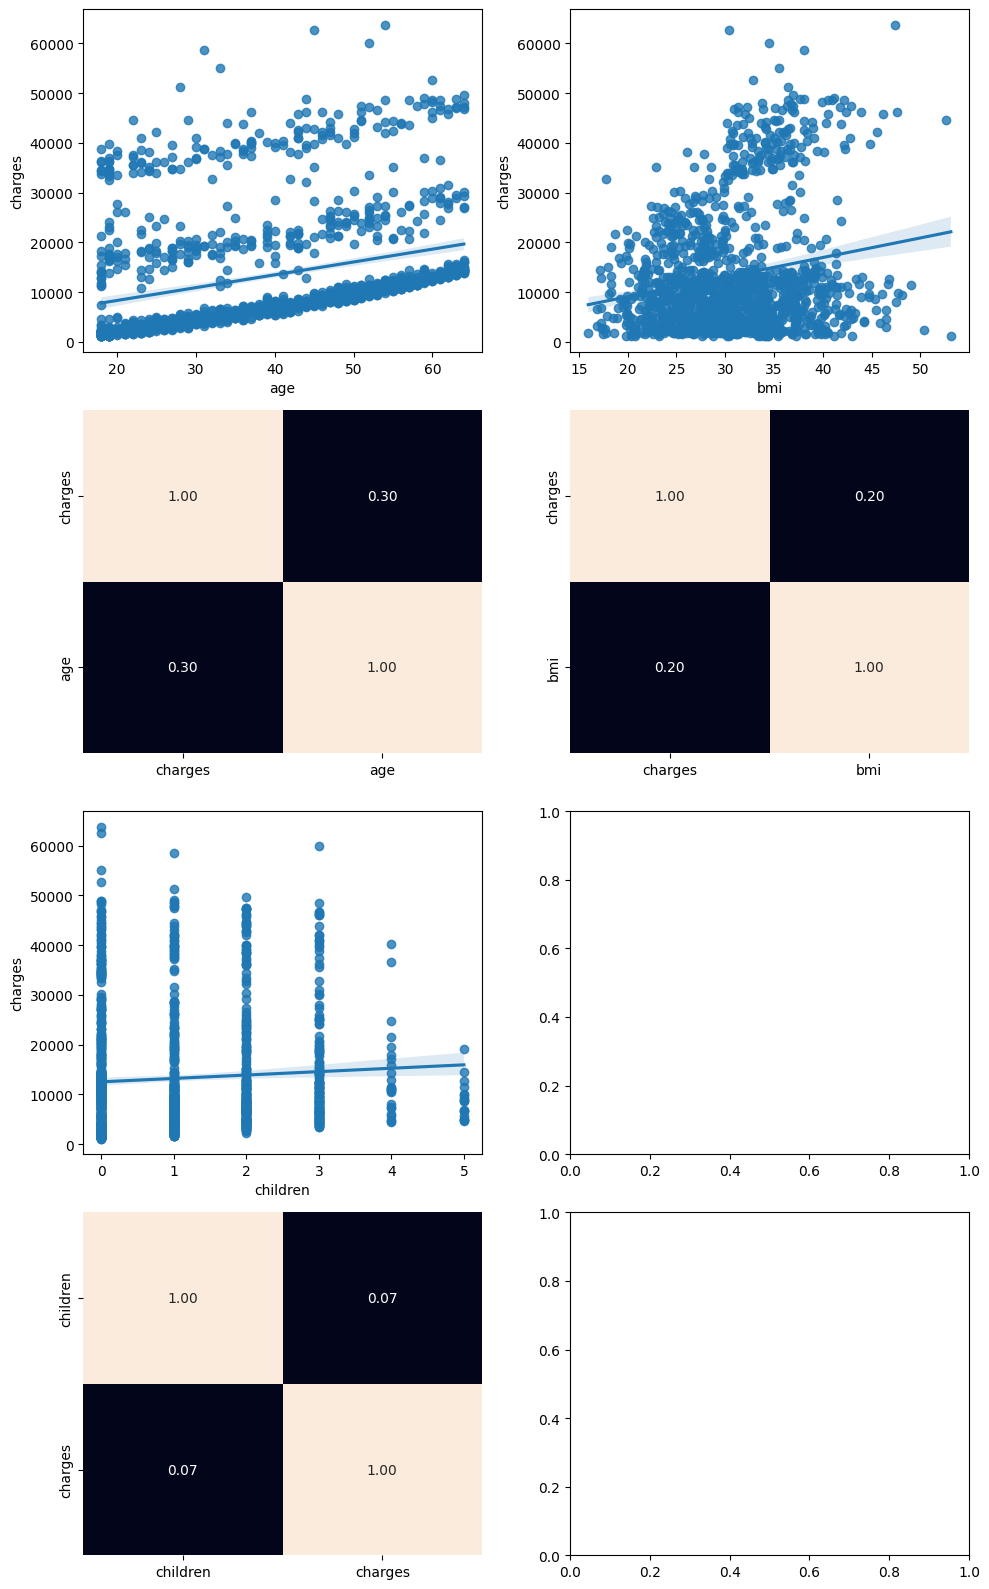

In [77]:
#analisis numerico-numerico
fig, axis = plt.subplots(4,2,figsize=(10,16))

sns.regplot(ax = axis[0,0], data=df, x='age', y= 'charges')
sns.heatmap(df[['charges', 'age']].corr(),annot=True,fmt='.2f', ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df, x='bmi', y= 'charges')
sns.heatmap(df[['charges', 'bmi']].corr(),annot=True,fmt='.2f', ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df, x='children', y= 'charges')
sns.heatmap(df[['children', 'charges']].corr(),annot=True,fmt='.2f', ax=axis[3,0],cbar=False)

plt.tight_layout()
plt.show()